In [4]:
import sys
from PyQt5.QtCore import QUrl
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEnginePage, QWebEngineView
import bs4 as bs
import urllib.request

In [5]:
# 用一個class實作Page
class Page(QWebEnginePage):

    def __init__(self, url):
        self.app = QApplication(sys.argv)
        QWebEnginePage.__init__(self)
        self.html = ''
        self.loadFinished.connect(self._on_load_finished)
        self.load(QUrl(url))
        self.app.exec_()   
    
    def _on_load_finished(self):
        self.html = self.toHtml(self.Callable)
        print('Load finished')

    def Callable(self, html_str):
        self.html = html_str
        self.app.quit()
ID = '21915848623492'
page = Page('https://goods.ruten.com.tw/item/show?'+ ID) # 沒有買家限制
soup = bs.BeautifulSoup(page.html, 'html.parser')

Load finished


<!DOCTYPE html>
<html lang="zh-TW" xml:lang="zh-TW" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <script async="" id="facebook-jssdk" src="//connect.facebook.net/zh_TW/sdk.js#xfbml=1&amp;version=v2.4">
 </script>
 <head>
  <script src="https://www.youtube.com/iframe_api">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagservices.com/tag/js/gpt.js" type="text/javascript">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味 - 露天拍賣
  </title>
  <meta content="【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味" name="description"/>
  <meta content="【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味 - 露天拍賣" itemprop="name"/>
  <meta content="【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味" i
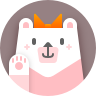
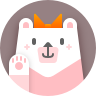

In [6]:
print(soup.prettify())

In [7]:
#商品名稱
name = soup.find('span', class_='vmiddle')
print (name.text)

【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味


In [8]:
#QQ幾張圖片，有四張
imag = soup.find('ul', class_='item-gallery-thumbnail-list js-img-list')
image_num=len (imag)  
print (image_num)

4


In [9]:
#商品編號
productID= soup.find('span', class_='content')
print (productID.text)

21915848623492


In [10]:
#商品狀態
status = soup.find('li', class_="status")
print (status.text)

物品狀況： 全新


In [11]:
#地點
location = soup.find('li', class_="location")
print (location.text)

物品所在地： 台灣.台南市


In [12]:
#上架時間
upload_time = soup.find('li', class_="upload-time")
print (upload_time.text)

上架時間： 2019-04-13 15:21:17


In [13]:
#買家下標限制
def limitbuy():
    limitation = soup.find('li', class_="limitation")
    if limitation != None:
        print(limitation.text)
    else:
        print('NA')
limitbuy()

買家下標限制： 
          評價總分必須 ≧ 0分近半年棄標次數 ≦ 5次


In [14]:
#開始價格
start_price = soup.find('li', class_="initiation").find('span')
print (start_price.text)

$33元


In [15]:
#是否提前結束
end = soup.find('li', class_="putforward")
print (end.text)

可能會提前結束販售


In [16]:
#直購價
price = soup.find('strong', class_ = "rt-text-xx-large")
print(price.text)

$33


In [17]:
#庫存大於 onlyone 不用迴圈
inventory = soup.find('strong', class_="rt-text-isolated")
print (inventory.text)

99


In [18]:
#已賣數量
def sellnum():
    sell_num = soup.find('strong', class_='rt-text-x-large number')
    if sell_num != None:
        print(sell_num.text)
    else:
        print('NA')
sellnum()

373


In [19]:
#已賣數量
sell_num = soup.find('strong', class_='rt-text-x-large number')
print(sell_num.text)

373


In [20]:
#QQ支付方式，同商品標題
payment = soup.find_all('span', class_='vmiddle')
for p in payment:
    print (p.text)

【貓總裁】台灣製 海之味貓咪主食罐 貓罐頭 用料超狂 有加干貝 放山雞 丁香魚 蝦仁 旗魚 鮪魚 85g 共有5種口味
Pi 拍錢包X支付連
PChomePay支付連 信用卡
PChomePay支付連 現金 (ATM、餘額、銀行支付)
7-11取貨付款
全家、OK、萊爾富取貨付款
喜歡這商品嗎?按讚及+1推薦給你的朋友吧！


In [21]:
#運送方式
#<span class="rt-align-middle"> 純方式，無價錢，四種
#<ul class="detail-list">
di = soup.find_all('ul', class_='detail-list')
for delivery in di:
    print (delivery.text)


Pi 拍錢包X支付連
               
              最高P幣 4.5% 回饋(說明)PChomePay支付連 信用卡PChomePay支付連 現金 (ATM、餘額、銀行支付)7-11取貨付款全家、OK、萊爾富取貨付款
全家、OK、萊爾富取貨付款
                65
                元7-11取貨付款
                65
                元郵寄寄送
                100
                元宅配/快遞
                100
                元離島寄送
                120
                元


In [22]:
di = soup.find_all('span', class_='rt-align-middle')
for dii in di:
    print (dii.text)

全家、OK、萊爾富取貨付款
7-11取貨付款
郵寄寄送
宅配/快遞
離島寄送


In [23]:
#賣家!!
se = soup.find('div', class_='seller-disc')
seller_ID =  [s for s in se.stripped_strings][0]
print(seller_ID)

baby740623


In [24]:
#評價!!
se = soup.find('div', class_='seller-disc')
reputation =  [s for s in se.stripped_strings][1]
print(reputation)

2073


In [25]:
#全部商品
all_list = soup.find('p', class_='seller-disc seller-disc-divider').find('strong')
print(all_list.text)

232


In [26]:
#商品價格與運費更新時間
#<span class="date">
update_time = soup.find('span', class_='date')
print(update_time.text)

2019-12-29 13:32:01


In [27]:
#問與答
q = soup.find_all('span', class_ ='rt-text-parentesis count')
QA = [qa for qa in q][0]
print(QA.text)

2


In [28]:
#購買人次
q = soup.find_all('span', class_ ='rt-text-parentesis count')
buyer_num = [qa for qa in q][1]
print(buyer_num.text)

85


In [29]:
import os
import csv
from datetime import datetime

In [30]:
#第一筆
with open('1.13ruten.csv','a',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','image_num','productID','start_price','price','inventory','sell_num','status','location','upload_time','update_time','end','seller_ID','reputation','all_list','QA','buyer_num'])
    #資料
    writer.writerow([name.text,image_num,productID.text,start_price.text,price.text,inventory.text,sell_num.text,status.text,location.text,upload_time.text,update_time.text,end.text,seller_ID,reputation,all_list.text,QA.text,buyer_num.text])

In [31]:
#第n筆
with open('1.13ruten.csv','a+',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
       #資料
    writer.writerow([name.text,image_num,productID.text,start_price.text,price.text,inventory.text,sell_num.text,status.text,location.text,upload_time.text,update_time.text,end.text,seller_ID,reputation,all_list.text,QA.text,buyer_num.text])

In [54]:
with open('1.10ruten.csv','a+',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
       #資料
    writer.writerow([name.text,image_num,productID.text,price.text,inventory.text,sellnum,seller_ID,reputation,QA.text,buyer_num.text])

In [29]:
#第一筆
with open('1.10ruten.csv','a',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','image_num','productID','price','inventory','sell_num','seller_ID','reputation','QA','buyer_num'])
    #資料
    writer.writerow([name.text,image_num,productID.text,price.text,inventory.text,sell_num.text,seller_ID,reputation,QA.text,buyer_num.text])

In [60]:
#第n筆
with open('1.10ruten.csv','a+',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
       #資料
    writer.writerow([name.text,image_num,productID.text,price.text,inventory.text,sell_num.text,seller_ID,reputation,QA.text,buyer_num.text])

AttributeError: 'NoneType' object has no attribute 'text'

In [28]:
with open('1.4new_ruten.csv','w',encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','image_num','no','price','ine','sell_num','seller','payment','di','get_pr'])
    #資料
    writer.writerow([name.text,image_num,no.text,price.text,ine.text,sell_num[0].text,seller.text,p.text,d.text.strip(),p.text])

In [45]:
with open(os.path.join(path, f'{year}_{month}_{day}_ruten.csv'),'w', newline='') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','no','price','ine','sell_num','seller'])
    #資料
    writer.writerow([name.text,no.text,price.text,ine.text,sell_num[0].text,seller.text])

FileNotFoundError: [Errno 2] No such file or directory: '\\mydata\\2019_12_19_ruten.csv'

In [104]:
year = 2019
month = 12
day = 19
path = "\mydata"

if os.path.isdir(path):
    os.makedirs(path)
with open(os.path.join(path, f'{year}_{month}_{day}_ruten.csv'),'w', newline='') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','no','price','ine','sell_num','seller'])
    #資料
    writer.writerow([name.text,no.text,price.text,ine.text,sell_num[0].text,seller.text])

FileNotFoundError: [Errno 2] No such file or directory: '\\mydata\\2019_12_19_ruten.csv'

In [103]:
#存多筆資料
year = 2019
month = 12
day = 19
path = "\mydata"

if os.path.isdir(path):
    os.makedirs(path)

with open(os.path.join(path, f'{year}_{month}_{day}_ruten.csv'),'w', newline='',encoding="Big5") as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','no','price','ine','sell_num','seller','ps'])
    #資料
    writer.writerow([name.text,no.text,price.text,ine.text,sell_num[0].text,seller.text,a.text.decode("utf-8")])

FileNotFoundError: [Errno 2] No such file or directory: '\\mydata\\2019_12_19_ruten.csv'

In [45]:
#第二筆資料
with open ('ruten.csv','a+') as csv_file:
    w=csv.writer(csv_file)
    data=["seller"]
    w.writerow(data)

In [107]:
import sys
sys.setdefaultencoding('utf-8')

AttributeError: module 'sys' has no attribute 'setdefaultencoding'

In [91]:
with open('new_ruten.csv','w', newline='',encoding="utf-8") as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','no','price','ine','sell_num','seller','ps'])
    #資料
    writer.writerow([name.text,no.text,price.text,ine.text,sell_num[0].text,seller.text,a.text])

In [95]:
with open('new_ruten.csv','w', newline='',encoding = 'utf-8') as csv_file:
    writer=csv.writer(csv_file)
    #變數名稱
    writer.writerow(['name','no','price','ine','sell_num','seller','ps'])
    #資料
    writer.writerow([name.text,no.text,price.text,ine.text,sell_num[0].text,seller.text,a.text.encode(encoding="utf-8", errors="strict")])